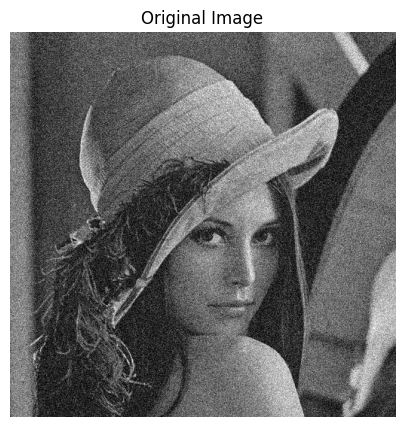

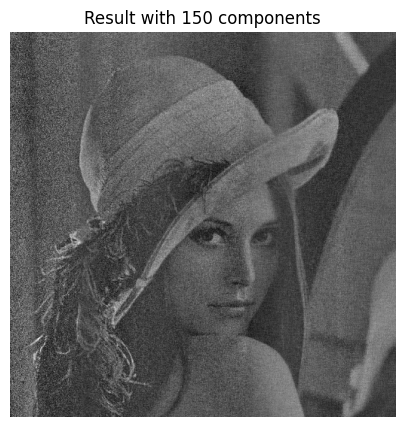

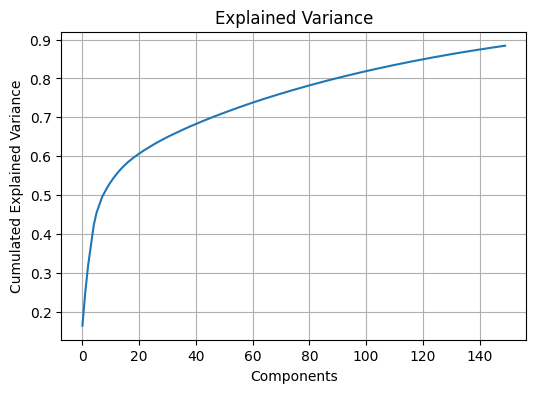

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from PIL import Image
from skimage.color import rgb2gray


def show_image(image, title):
    plt.figure(figsize=(10, 5))
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()


# Load image and convert to NB
image_path = "../src/base_lena_bruit.png"
image = Image.open(image_path)
image = np.array(image)

if image.ndim == 3:
    image = rgb2gray(image)

show_image(image, "Original Image")

n_components = 150

scaler = StandardScaler()
image_scaled = scaler.fit_transform(image)

pca = PCA(n_components=n_components)
transformed_data = pca.fit_transform(image_scaled)

reconstructed_image = pca.inverse_transform(transformed_data) + np.mean(image, axis=0)

show_image(reconstructed_image, f"Result with {n_components} components")

# Variance Ratio
plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Components")
plt.ylabel("Cumulated Explained Variance")
plt.title("Explained Variance")
plt.grid(True)
plt.show()